In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sea_avg_multi.csv')
df.head()

,Year,Extent,Global CO2,Temp Diff From Average
0,1978,12.487000,335.415000,0.07
1,1979,12.319560,336.835000,0.16
2,1980,12.334148,338.762500,0.26
3,1981,12.135486,340.120000,0.32
4,1982,12.439445,341.478333,0.14


In [3]:
#Splitting X and Y
y = df['Extent'].to_numpy()
X = df.drop(['Extent'],axis=1)
X.head()

,Year,Global CO2,Temp Diff From Average
0,1978,335.415000,0.07
1,1979,336.835000,0.16
2,1980,338.762500,0.26
3,1981,340.120000,0.32
4,1982,341.478333,0.14


In [4]:
degree = 3
col_list = X.columns

for i in range(2,degree+1):
    for col in col_list:
        new_degree = str(i)
        col_degree = col+'^'+new_degree
        X[col_degree] = X[col]**i

X.head()

,Year,Global CO2,Temp Diff From Average,Year^2,Global CO2^2,Temp Diff From Average^2,Year^3,Global CO2^3,Temp Diff From Average^3
0,1978,335.415000,0.07,3912484,112503.222225,0.0049,7738893352,3.773527e+07,0.000343
1,1979,336.835000,0.16,3916441,113457.817225,0.0256,7750636739,3.821656e+07,0.004096
2,1980,338.762500,0.26,3920400,114760.031406,0.0676,7762392000,3.887640e+07,0.017576
3,1981,340.120000,0.32,3924361,115681.614400,0.1024,7774159141,3.934563e+07,0.032768
4,1982,341.478333,0.14,3928324,116607.452136,0.0196,7785938168,3.981892e+07,0.002744


In [5]:
#Z normalisation
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
print(u.shape, std.shape)

X = (X-u)/std
print(X.head())
print(type(X))

ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
print(type(X))

#Just to see if X is right, we dont need a dataframe after we got numpy array for X and y
#df = pd.DataFrame(X)
#df.head()

(9,) (9,)
       Year  Global CO2  Temp Diff From Average    Year^2  Global CO2^2  \
0 -1.693979   -1.540209               -1.708614 -1.687902     -1.482268   
1 -1.616980   -1.481698               -1.361578 -1.611731     -1.429981   
2 -1.539981   -1.402275               -0.975984 -1.535521     -1.358653   
3 -1.462982   -1.346340               -0.744627 -1.459273     -1.308174   
4 -1.385983   -1.290370               -1.438697 -1.382987     -1.257461   

   Temp Diff From Average^2    Year^3  Global CO2^3  Temp Diff From Average^3  
0                 -1.124153 -1.681836     -1.425796                 -0.840042  
1                 -1.052694 -1.606487     -1.379229                 -0.827030  
2                 -0.907704 -1.531062     -1.315389                 -0.780292  
3                 -0.787570 -1.455560     -1.269989                 -0.727619  
4                 -1.073407 -1.379982     -1.224197                 -0.831718  
<class 'pandas.core.frame.DataFrame'>
(45, 10)
<class 'nump

In [6]:
#vectorised stuff instead of running loops and storing values in list
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_hat = hypothesis(X,theta)
    e = np.sum((y-y_hat)**2)
    
    return e/m

def gradient(X,y,theta):
    y_hat = hypothesis(X,theta)
    grad = np.dot(X.T,(y_hat-y))
    m = X.shape[0]
    
    return grad/m

def gradient_descent(X,y,learning_rate,max_epochs):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [7]:
learning_rate = 0.1
epochs = 100
theta, error_list = gradient_descent(X,y,learning_rate,epochs)

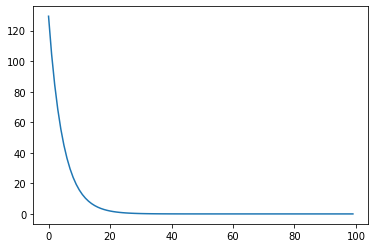

In [8]:
#Plotting error
plt.plot(error_list)
plt.show()

In [9]:
y_hat = hypothesis(X,theta)
y_hat

array([12.43648251, 12.35332963, 12.25641334, 12.18519955, 12.26480166,
       12.12535531, 12.18420951, 12.17408769, 12.10761156, 11.98453971,
       11.89709587, 11.94427808, 11.78848331, 11.79287552, 11.88309829,
       11.84908176, 11.76243612, 11.63455703, 11.68283777, 11.55287881,
       11.39893224, 11.53103815, 11.49241248, 11.3534363 , 11.24191817,
       11.20865918, 11.23744546, 11.08199413, 11.07738851, 11.01425817,
       11.07650851, 10.94930532, 10.84628461, 10.90478336, 10.83109065,
       10.77017952, 10.66881343, 10.47489562, 10.30993409, 10.36332986,
       10.39481789, 10.21547659, 10.12850192, 10.27334209, 10.23304828])

In [10]:
def r2_score(y,y_hat):
    num = np.sum((y-y_hat)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1-num/denom)
    return score*100

r2_score(y,y_hat)

90.43343382008375

[-1.69397911 -1.61698006 -1.53998101 -1.46298196 -1.38598291 -1.30898386
 -1.23198481 -1.15498576 -1.0779867  -1.00098765 -0.9239886  -0.84698955
 -0.7699905  -0.69299145 -0.6159924  -0.53899335 -0.4619943  -0.38499525
 -0.3079962  -0.23099715 -0.1539981  -0.07699905  0.          0.07699905
  0.1539981   0.23099715  0.3079962   0.38499525  0.4619943   0.53899335
  0.6159924   0.69299145  0.7699905   0.84698955  0.9239886   1.00098765
  1.0779867   1.15498576  1.23198481  1.30898386  1.38598291  1.46298196
  1.53998101  1.61698006  1.69397911]


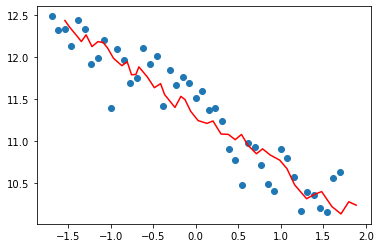

In [11]:
import matplotlib.pyplot as plt
#x = df2['Year'].to_numpy()
print(X[:,1])
plt.scatter(X[:,1],y)
plt.plot(X[:,2],y_hat,c="red")
plt.show()